# Funcionamento das Simulações

Os scripts disponíveis no repositório utilizam a função ``run_simulations`` de ``components/qkd/app.py`` para executar as simulações. Ou seja, antes de realizar a simulação, é necessário definir os seus parâmetros. Este documento é uma demonstração de simulação.

Nesse sentido, antes de tudo, é necessário importar as dependências.

In [1]:
# Dependências
from components import Network, Controller
from components.qkd.app import *
import numpy as np

Em seguida, deve-se criar uma rede e definir sua topologia. As topologias disponíveis e a forma de escolhê-las podem ser visualizadas em ``components/network.py``. O controlador recebe a rede que irá controlar.

In [2]:
# Criação da rede
rede = Network()
rede.set_topology("Lattice", 3, 3)
controlador = Controller(rede)

Além da topologia, outros detalhes são importantes, como o número de qubits enviados por execução de protocolo, o número de pares epr disponíveis por canal em um slot e a fidelidade da rede.

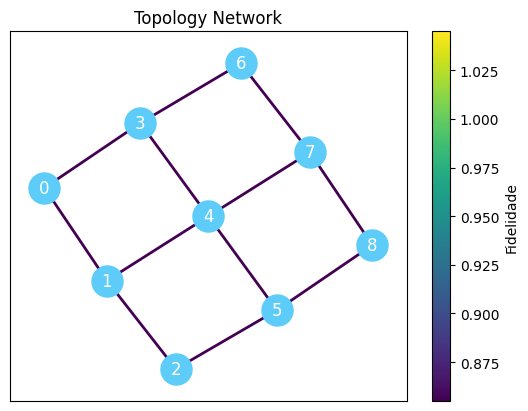

In [3]:
# Algumas propriedades da rede
rede.nqubits = 300
rede.neprs = 3
rede.set_fidelity(0.95)
rede.draw()

A partir disso, deve-se definir as informações para a simulação: número de simulações, número de requests por simulação, qual o caso (mais detalhes na função ``generate_qkd_requests()`` em ``components/qkd/app.py``), quais protocolos disponíveis, entre outros.

In [4]:
# Informações da simulação
n_simulacoes = 10
n_requests = 10
caso = 1
apps = ["BB84", "B92", "E91"]
apps_distribution = [0.33, 0.33, 0.33]
routes_calculation_type = "kshortest"

Finalmente, a função pode ser chamada com os devidos argumentos.

In [5]:
vazao, taxa = run_simulations(rede, controlador, n_simulacoes, n_requests, apps, apps_distribution, caso, routes_calculation_type)

Essa função retorna a vazão e a taxa de sucesso das chaves.

In [6]:
print("Vazão média: ", np.mean(vazao))
print("Desvio padrão da vazão: ", np.std(vazao))
print("Taxa média: ", np.mean(taxa))
print("Desvio padrão da taxa: ", np.std(taxa))

Vazão média:  0.9239028944911297
Desvio padrão da vazão:  0.3751705414354817
Taxa média:  0.35432643946467474
Desvio padrão da taxa:  0.068914070751374
